# Problem

1. What was the average rating of each genre of movie? 
2. What were the top 3 highest and lowest rated genres? 
3. Which movies were ranked the most frequently? 
4. Who are the top 3 most frequent reviewers? What is their average rating score? 
5. Do the top 3 most frequent reviewers prefer a certain genres more than the others? Which ones? 

## Planning:

1. Preprocessing
2. Analysis of reviews for genre
3. Analysis for movie reviews
4. Analysis of reviewer frequency
5. Conclusion

### Preprocessing
1. Removing any null values from the reviews
2. Removing any duplicated values
3. Merging the dataframes

In [202]:
import pandas as pd
import numpy as np

In [204]:
# Examining the 'ratings' table
df = pd.read_csv("ratings.csv")
print(df.head(), "\n\n", df.describe())

   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523 

               userId        movieId         rating     timestamp
count  105339.000000  105339.000000  105339.000000  1.053390e+05
mean      364.924539   13381.312477       3.516850  1.130424e+09
std       197.486905   26170.456869       1.044872  1.802660e+08
min         1.000000       1.000000       0.500000  8.285650e+08
25%       192.000000    1073.000000       3.000000  9.711008e+08
50%       383.000000    2497.000000       3.500000  1.115154e+09
75%       557.000000    5991.000000       4.000000  1.275496e+09
max       668.000000  149532.000000       5.000000  1.452405e+09


In [206]:
# Examining the 'movies' table
df2 = pd.read_csv("movies.csv.xls")
print(df2.head(), '\n\n', df2['movieId'].unique())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

 [     1      2      3 ... 148238 148626 149532]


In [208]:
# Merging the movies table and ratings table based on the 'movieId' comlumn
merged_df = pd.merge(df, df2, on = "movieId", how= "right")
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,2.0,1,5.0,8.590469e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,1.303501e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,8.0,1,5.0,8.586109e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,11.0,1,4.0,8.508158e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,14.0,1,4.0,8.517663e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [210]:
# Determining if there are any null reviews
merged_df['rating'].isna().sum()

4

In [212]:
# Dropping the reviews with null values
merged_df = merged_df.dropna()

In [214]:
duplicates = merged_df.duplicated()
duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
105338    False
105339    False
105340    False
105341    False
105342    False
Length: 105339, dtype: bool

In [216]:
# No duplicates observed
duplicates[duplicates == 'True']

Series([], dtype: bool)

### Genre Analysis
1. Average reviews per genre
2. Determining top 3 highest and lowest rated genres
3. Visualizing average score per genre

In [219]:
# Splitting up the string in 'genre' column into individual genres
sub = merged_df["genres"].str.split('|', expand=True)
sub.head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
2,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
3,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
4,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None


In [221]:
# Adding a column for each unique genre within the 'sub' dataframe into the originally merged dataframe
genres = []
for i in range (10):
    li = sub[i].unique()
    for j in li:
        if(j not in genres and j is not None):
            genres.append(j)
            merged_df[j] = 0
    
print(genres)

['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children', 'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror', 'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi', 'Musical', 'War', '(no genres listed)', 'IMAX']


In [223]:
merged_df.columns 

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror', 'Fantasy',
       'Western', 'Film-Noir', 'Romance', 'Sci-Fi', 'Musical', 'War',
       '(no genres listed)', 'IMAX'],
      dtype='object')

In [225]:
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,Adventure,Comedy,Action,Drama,...,Horror,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,(no genres listed),IMAX
0,2.0,1,5.0,8.590469e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,1,4.0,1.303501e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,1,5.0,8.586109e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.0,1,4.0,8.508158e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,1,4.0,8.517663e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
# Initializing avg rating to be [0,0] where the first element is total movies of the type and 2nd element is sum of reviews
avg_ratings = {}
for i in genres:
    avg_ratings[i] = [0, 0]
avg_ratings

{'Adventure': [0, 0],
 'Comedy': [0, 0],
 'Action': [0, 0],
 'Drama': [0, 0],
 'Crime': [0, 0],
 'Children': [0, 0],
 'Mystery': [0, 0],
 'Animation': [0, 0],
 'Documentary': [0, 0],
 'Thriller': [0, 0],
 'Horror': [0, 0],
 'Fantasy': [0, 0],
 'Western': [0, 0],
 'Film-Noir': [0, 0],
 'Romance': [0, 0],
 'Sci-Fi': [0, 0],
 'Musical': [0, 0],
 'War': [0, 0],
 '(no genres listed)': [0, 0],
 'IMAX': [0, 0]}

In [229]:
# Calculating total reviews and score per genre
for index, row in merged_df.iterrows():
    avg_ratings[i] = [0, 0]
    li2 = row['genres'].split("|")
    for j in li2:
        merged_df.at[index, j] = 1
        avg_ratings[j][0]+=1;
        avg_ratings[j][1]+=row["rating"]
avg_ratings

{'Adventure': [23076, 81182.0],
 'Comedy': [38055, 130186.0],
 'Action': [31205, 107702.5],
 'Drama': [46960, 171416.5],
 'Crime': [18291, 66623.0],
 'Children': [8098, 27852.5],
 'Mystery': [8320, 30385.0],
 'Animation': [5966, 21688.5],
 'Documentary': [1206, 4393.5],
 'Thriller': [29288, 102378.0],
 'Horror': [7983, 26193.0],
 'Fantasy': [10889, 38116.5],
 'Western': [2314, 8251.0],
 'Film-Noir': [1210, 4735.5],
 'Romance': [19094, 67674.0],
 'Sci-Fi': [16795, 58018.0],
 'Musical': [4287, 15313.0],
 'War': [5828, 22048.5],
 '(no genres listed)': [7, 21.5],
 'IMAX': [0, 0]}

In [230]:
# Deleting the IMAX genre as it has no reviews entered and then computing average rating per genre
del avg_ratings['IMAX']
genres.remove('IMAX')
for i in genres:
    avg_ratings[i] = round((avg_ratings[i][1]/avg_ratings[i][0]), 2)

In [233]:
avg_ratings

{'Adventure': 3.52,
 'Comedy': 3.42,
 'Action': 3.45,
 'Drama': 3.65,
 'Crime': 3.64,
 'Children': 3.44,
 'Mystery': 3.65,
 'Animation': 3.64,
 'Documentary': 3.64,
 'Thriller': 3.5,
 'Horror': 3.28,
 'Fantasy': 3.5,
 'Western': 3.57,
 'Film-Noir': 3.91,
 'Romance': 3.54,
 'Sci-Fi': 3.45,
 'Musical': 3.57,
 'War': 3.78,
 '(no genres listed)': 3.07}

In [235]:
import matplotlib.pyplot as plt

<BarContainer object of 19 artists>

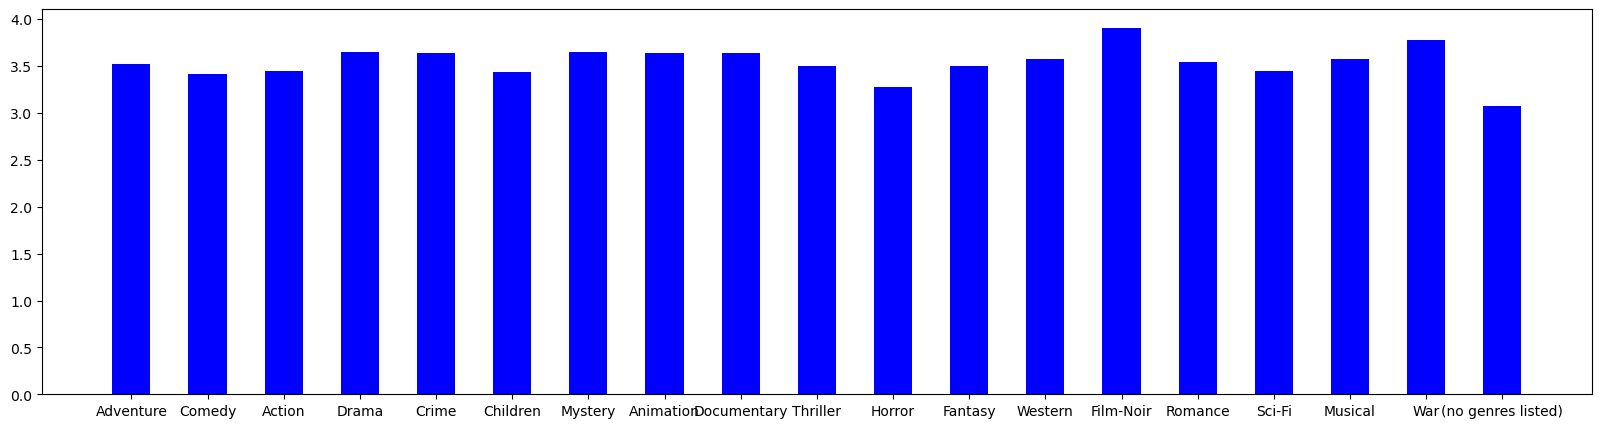

In [237]:
# Visualizing average rating per genre
fig = plt.figure(figsize = (20, 5))
plt.bar(avg_ratings.keys(), avg_ratings.values(), color = "blue", width = 0.5)

In [239]:
# Organizing the key value pairs in decreasing order as a list
ordered_rating = []
max_key = 'Adventure'
max_val = avg_ratings['Adventure']
while (len(ordered_rating) < 19):
    for key, value in avg_ratings.items():
        if(value > max_val):
            max_key = key
            max_val = value
    ordered_rating.append((max_key, max_val))
    del avg_ratings[max_key]
    max_val = 0
    max_key = ""
    

In [241]:
# Printing genres as per rating in decreasing order
ordered_rating

[('Film-Noir', 3.91),
 ('War', 3.78),
 ('Drama', 3.65),
 ('Mystery', 3.65),
 ('Crime', 3.64),
 ('Animation', 3.64),
 ('Documentary', 3.64),
 ('Western', 3.57),
 ('Musical', 3.57),
 ('Romance', 3.54),
 ('Adventure', 3.52),
 ('Thriller', 3.5),
 ('Fantasy', 3.5),
 ('Action', 3.45),
 ('Sci-Fi', 3.45),
 ('Children', 3.44),
 ('Comedy', 3.42),
 ('Horror', 3.28),
 ('(no genres listed)', 3.07)]

### Results

1. What was the average rating of each genre of movie?
The average rating per movie genre is as follows:

| Genre | Rating |
| ----- | ------ |
| Film-Noir | 3.91 |
| War | 3.78 |
| Drama | 3.65 |
| Mystery | 3.65 |
| Crime | 3.64 |
| Animation | 3.64 |
| Documentary | 3.64 |
| Western | 3.57 |
| Musical | 3.57 |
| Romance | 3.54 |
| Adventure | 3.52 |
| Thriller | 3.5 |
| Fantasy | 3.5 |
| Action | 3.45 |
| Sci-Fi | 3.45 |
| Children | 3.44 |
| Comedy | 3.42 |
| Horror | 3.28 |
| (no genres listed) | 3.07 |


2. What were the top 3 highest and lowest rated genres?

Highest Rated Genres:
| Genre | Rating |
| ----- | ------ |
| Film-Noir | 3.91 |
| War | 3.78 |
| Drama | 3.65 |
| Mystery | 3.65 |

Lowest Rated Genres:
| Genre | Rating |
| ----- | ------ |
| Comedy | 3.42 |
| Horror | 3.28 |
| (no genres listed) | 3.07 |

In [245]:
# PRINTING TOP THREE HIGHEST RATED AND LOWEST RATED GENRES ARE:
print("Top Three rankings\n---------------------")
print("1st Place: ", ordered_rating[0][0])
print("2nd Place: ", ordered_rating[1][0])
print("3rd Place: ()", ordered_rating[2][0])
print("-----------------------------------------\nBottom Three rankings\n---------------------")
print("3rd Last Place: ", ordered_rating[16][0])
print("2nd Last Place: ", ordered_rating[17][0])
print("Last Place: ", ordered_rating[18][0])
print("-----------------------------------------")

Top Three rankings
---------------------
1st Place:  Film-Noir
2nd Place:  War
3rd Place: () Drama
-----------------------------------------
Bottom Three rankings
---------------------
3rd Last Place:  Comedy
2nd Last Place:  Horror
Last Place:  (no genres listed)
-----------------------------------------


### Reviews Analysis for movies and User Id

1. Analysis of number of reviews per user
2. Analysis of number of reviews per movie
3. Examining most frequently reviewed movie
4. Examining users with most reviews and the genres they reviewed

In [330]:
len(merged_df['title'].unique()) # Total number of movies reviewed

10323

In [331]:
len(merged_df['userId'].unique()) # Total number of reviewers

668

In [253]:
# Calculating the number of reviews per movie and user
reviewers_avg = {} # A: (B, C) format where A = user id number, B = count of movies reviewed, C = total score given
movies_avg_score = {}

def avg_scorer(diction, series):
    for index, value in merged_df.iterrows():
        if(value[series] in diction.keys()):
            diction[value[series]][0] += 1 # Counter
            diction[value[series]][1] += value['rating'] # Score summation
        else:
            diction[value[series]] = [0, 0]
avg_scorer(reviewers_avg, 'userId')
avg_scorer(movies_avg_score, 'movieId')

In [296]:
# Function for most frequently ranked movies and most frequently written reviews (with lower bound)
def top_rankers(diction, num):
    lister = []
    for x in diction.keys():
        if(diction[x][0] > num):
            lister.append([x, diction[x][0], diction[x][1]])
    return lister

most_movie_reviews = top_rankers(movies_avg_score, 280)
most_reviews_written = top_rankers(reviewers_avg, 1250)
print(len(most_movie_reviews), len(most_reviews_written))
print(most_movie_reviews)
print("--------------------")
print(most_reviews_written)

5 5
[[296, 324, 1348.0], [318, 307, 1368.0], [356, 310, 1284.0], [480, 293, 1072.5], [593, 289, 1211.5]]
--------------------
[[232.0, 1420, 5500.5], [310.0, 1286, 3905.0], [458.0, 2085, 7029.0], [575.0, 2836, 8691.5], [668.0, 5677, 15879.5]]


In [298]:
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [300]:
# replaces movie id with movie name and calculates their average scores
for i in most_movie_reviews:
    i[0] = df2.loc[i[0], 'title'] # replace movie id with title
    i[2] = round(i[2]/ i[1], 2) # replaces total counted score with average score
    print(i)


['Walking Dead, The (1995)', 324, 4.16]
['Higher Learning (1995)', 307, 4.46]
['In the Mouth of Madness (1995)', 310, 4.14]
['Sirens (1994)', 293, 3.66]
['Feeling Minnesota (1996)', 289, 4.19]


In [302]:
# calculates the average scores for user
for i in most_reviews_written:
    i[2] = round(i[2]/ i[1], 2) # replaces total counted score with average score
    print(i)

[232.0, 1420, 3.87]
[310.0, 1286, 3.04]
[458.0, 2085, 3.37]
[575.0, 2836, 3.06]
[668.0, 5677, 2.8]


In [306]:
# Examining the genre interests of top 3 reviewers with function reviewers_analysis
reviewer_232 = merged_df[merged_df['userId'] == 232.0]
reviewer_310 = merged_df[merged_df['userId'] == 310.0]
reviewer_458 = merged_df[merged_df['userId'] == 458.0]

def reviewers_analysis(sub_df):
    genre_counter = {}
    for index, value in sub_df.iterrows():
        for g in value['genres'].split("|"):
            if(g in genre_counter.keys()):
                genre_counter[g]+=1
            else:
                genre_counter[g] = 0
    return genre_counter
    
analysis_232 = reviewers_analysis(reviewer_232)
analysis_310 = reviewers_analysis(reviewer_310)
analysis_458 = reviewers_analysis(reviewer_458)
print("User 232 Analysis: ", "\n", analysis_232)
print("User 310 Analysis: ", "\n", analysis_310)
print("User 458 Analysis: ", "\n", analysis_458) 

User 232 Analysis:  
 {'Adventure': 287, 'Animation': 113, 'Children': 134, 'Comedy': 606, 'Fantasy': 196, 'Romance': 147, 'Mystery': 125, 'Sci-Fi': 268, 'Thriller': 500, 'Drama': 454, 'Action': 410, 'Crime': 193, 'War': 31, 'Horror': 257, 'Musical': 28, 'IMAX': 87, 'Documentary': 36, 'Western': 10, 'Film-Noir': 3}
User 310 Analysis:  
 {'Adventure': 212, 'Animation': 38, 'Children': 51, 'Comedy': 463, 'Fantasy': 97, 'Action': 308, 'Crime': 229, 'Thriller': 349, 'Romance': 260, 'Drama': 719, 'Horror': 56, 'Mystery': 91, 'Sci-Fi': 166, 'War': 72, 'IMAX': 17, 'Film-Noir': 11, 'Western': 15, 'Musical': 19, 'Documentary': 23}
User 458 Analysis:  
 {'Adventure': 333, 'Animation': 73, 'Children': 81, 'Comedy': 733, 'Fantasy': 98, 'Action': 589, 'Crime': 505, 'Thriller': 599, 'Romance': 295, 'Drama': 1106, 'Horror': 60, 'Mystery': 146, 'Sci-Fi': 193, 'War': 129, 'IMAX': 51, 'Documentary': 21, 'Western': 72, 'Film-Noir': 40, 'Musical': 45}


In [308]:
# returns highest rated genre for each of the top reviewers
def most_rev_genre(user_revs):
    gen = ""
    reviews = 0
    for i in user_revs.keys():
        if(user_revs[i]>reviews):
            gen = i
            reviews = user_revs[i]
    return (gen, reviews)

print(most_rev_genre(analysis_232))
print(most_rev_genre(analysis_310))
print(most_rev_genre(analysis_458))

('Comedy', 606)
('Drama', 719)
('Drama', 1106)


### Results

1. Which movies were ranked the most frequently?

The top 5 most frequently ranked movies were:
| Movie | Total Reviews| Average Rating|
| ----- | -------------| --------------|
|The Walking Dead | 324 | 4.16 |
|Higher Learning| 307| 4.46|
|In the Mouth of Madness| 310| 4.14|
|Sirens|293|3.66|
|Feeling Minnesota|289|4.19|

  
2. Who are the top 3 most frequent reviewers? What is their average rating score?

The top 3 most frequent reviewers were:

|User Id| Total Reviews| Average Ratings|
|-------|-------------|---------------|
|232.0|1420|3.87|
|310.0|1286|3.04|
|458.0|2085|3.37|


3. Do the top 3 most frequent reviewers prefer a certain genres more than the others? Which ones?

It was observed that user 232 has reviewed "Comedy" movies most frequently. Meanwhile, users 310 and 458 primarily reviewed "Drama" genres.

In [314]:
merged_df.to_csv("Merged Movie Review Table", index = False)

In [316]:
merged_df.to_excel("Final_Movies_Reviews_Table.xlsx",index = False)